In [9]:
# Example code used heavily throughout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
for col in data.columns:
    display(data[col].describe())

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [4]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Pregnancies done
Glucose done
BloodPressure done
SkinThickness done
Insulin done
BMI done
DiabetesPedigreeFunction done
Age done
Outcome done


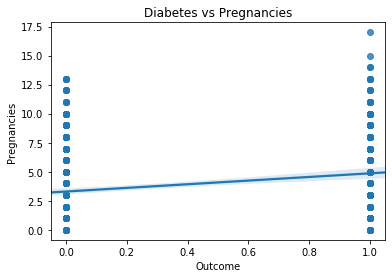

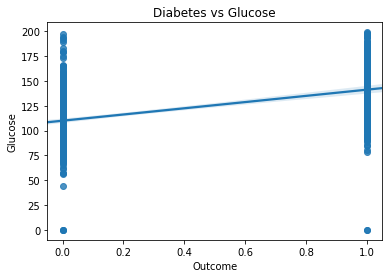

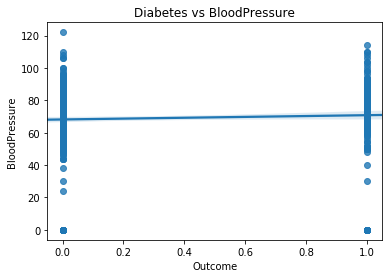

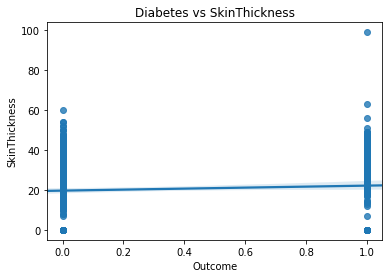

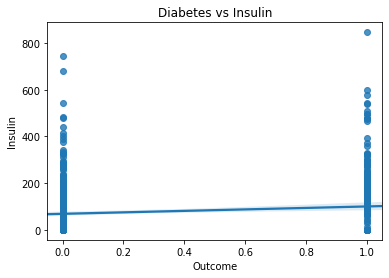

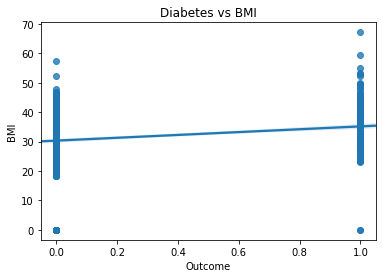

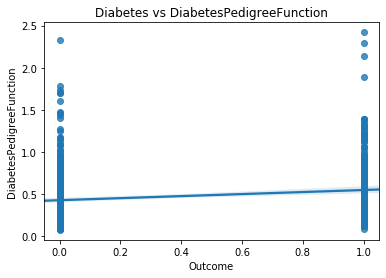

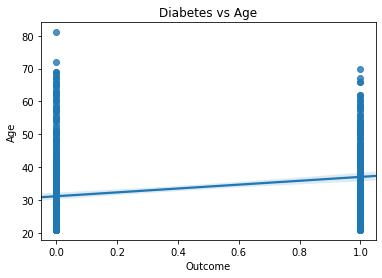

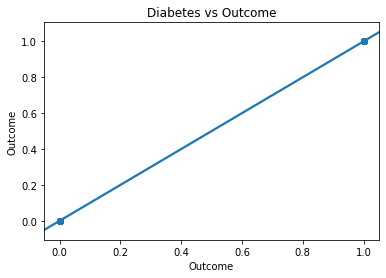

In [11]:
for col in data.columns:
    plt.figure()
    plt.title('Diabetes vs '+col)
    ax = sns.regplot(x='Outcome', y=col, data=data)
    print(col + " done")

In [13]:
X = data.drop(columns=['Outcome'])
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
scaler = StandardScaler() # Fit only to the training data
scaler.fit(X_train) # Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
mlp0 = MLPClassifier(hidden_layer_sizes=(2),max_iter=500)
mlp1 = MLPClassifier(hidden_layer_sizes=(3, 11, 10),max_iter=500)
mlp2 = MLPClassifier(hidden_layer_sizes=(6, 9, 12, 7),max_iter=500)

In [25]:
mlp0.fit(X_train,y_train)
mlp1.fit(X_train,y_train)
mlp2.fit(X_train,y_train)

c:\users\chase\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\chase\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 9, 12, 7), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [26]:
predictions0 = mlp0.predict(X_test)
predictions1 = mlp1.predict(X_test)
predictions2 = mlp2.predict(X_test)

In [27]:
print(confusion_matrix(y_test,predictions0))
print(confusion_matrix(y_test,predictions1))
print(confusion_matrix(y_test,predictions2))

[[125  13]
 [ 25  29]]
[[118  20]
 [ 23  31]]
[[114  24]
 [ 18  36]]


In [28]:
print(classification_report(y_test,predictions0))
print(classification_report(y_test,predictions1))
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       138
           1       0.69      0.54      0.60        54

    accuracy                           0.80       192
   macro avg       0.76      0.72      0.74       192
weighted avg       0.79      0.80      0.79       192

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       138
           1       0.61      0.57      0.59        54

    accuracy                           0.78       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       138
           1       0.60      0.67      0.63        54

    accuracy                           0.78       192
   macro avg       0.73      0.75      0.74       192
weighted avg       0.79      0.78      0.78       192



In [29]:
# for i in range(2,15):
#     mlp = MLPClassifier(hidden_layer_sizes=(i),max_iter=500)
#     mlp.fit(X_train,y_train)
#     predictions = mlp.predict(X_test)
#     print('***** ',i,' *****')
#     print(classification_report(y_test,predictions))
#     print()

In [33]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp0.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp0.coefs_)):
    m = len(mlp0.coefs_[l])
    n = len(mlp0.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp0.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp0.intercepts_[l]) for l,_ in enumerate(mlp0.intercepts_)]))

This dataset has 8 input nodes and 2 output node(s)
There are 2 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 8x2 (8 nodes feeding into a layer of 2 nodes)
  1: 2x1 (2 nodes feeding into a layer of 1 nodes)

There are 2 1D arrays of intercepts, one for each layer
Each layer has [2, 1] intercepts, one for each node


In [35]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp1.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp1.coefs_)):
    m = len(mlp1.coefs_[l])
    n = len(mlp1.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp1.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp1.intercepts_[l]) for l,_ in enumerate(mlp1.intercepts_)]))

This dataset has 8 input nodes and 2 output node(s)
There are 4 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 8x3 (8 nodes feeding into a layer of 3 nodes)
  1: 3x11 (3 nodes feeding into a layer of 11 nodes)
  2: 11x10 (11 nodes feeding into a layer of 10 nodes)
  3: 10x1 (10 nodes feeding into a layer of 1 nodes)

There are 4 1D arrays of intercepts, one for each layer
Each layer has [3, 11, 10, 1] intercepts, one for each node


In [36]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp2.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp2.coefs_)):
    m = len(mlp2.coefs_[l])
    n = len(mlp2.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp2.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp2.intercepts_[l]) for l,_ in enumerate(mlp2.intercepts_)]))

This dataset has 8 input nodes and 2 output node(s)
There are 5 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 8x6 (8 nodes feeding into a layer of 6 nodes)
  1: 6x9 (6 nodes feeding into a layer of 9 nodes)
  2: 9x12 (9 nodes feeding into a layer of 12 nodes)
  3: 12x7 (12 nodes feeding into a layer of 7 nodes)
  4: 7x1 (7 nodes feeding into a layer of 1 nodes)

There are 5 1D arrays of intercepts, one for each layer
Each layer has [6, 9, 12, 7, 1] intercepts, one for each node


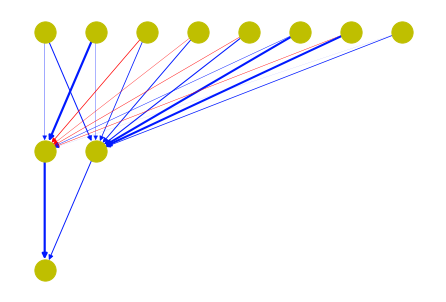

In [38]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

mlp = mlp0

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)

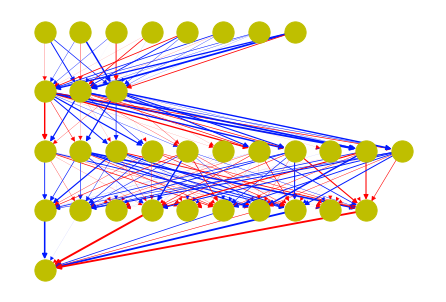

In [39]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

mlp = mlp1

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)

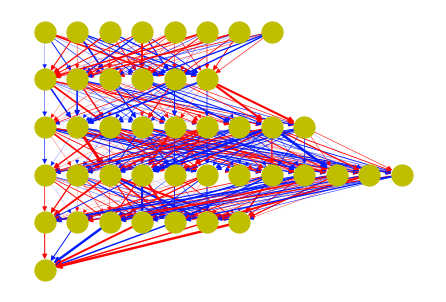

In [40]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

mlp = mlp2

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)